In [2]:
import pandas as pd
from pepfun import *

import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev
from scipy import stats
import random

In [3]:
#load data with the right format, specially the header
vae_spea = pd.read_csv('VAE_spea_trim.csv')

In [4]:
#select set of samples
vae_spea = vae_spea.sample(1000)

In [5]:
#save set of samples used
vae_spea.to_csv('VAE_spea_sample.csv')

In [2]:
vae_solub = pd.read_csv('VAE_solub_trim.csv')
vae_synt = pd.read_csv('VAE_synt_trim.csv')

In [3]:
vae_solub = vae_solub.sample(1000)
vae_synt = vae_synt.sample(1000)

In [26]:
vae_raw = pd.read_csv('VAE_original_results.csv')

In [34]:
vae_gen =pd.read_csv('VAE_generated_results.csv')

In [27]:
vae_raw = vae_raw.sample(1000)

In [35]:
vae_gen = vae_gen.sample(1000)

In [5]:
vae_solub.to_csv('vae_solub_sample.csv')
vae_synt.to_csv('vae_synt_sample.csv')

In [29]:
vae_raw.to_csv('vae_raw_sample.csv')

In [36]:
vae_gen.to_csv('vae_gen_sample.csv')

In [9]:
vae_nsga.to_csv('vae_nsga_sample.csv')

In [10]:
vae_hydro.to_csv('vae_hydro_sample.csv')

In [2]:
vae_raw = pd.read_csv('VAE_original_results.csv')
vae_generated = pd.read_csv('VAE_generated_results.csv')

In [6]:
raw_vae = vae_raw.sample(1000)

,proteins,hydrophobicity,solubility_rules,synthesis_rules,hmm
12605,MGFQPELRDGGEPIRFAYWVPNVSGGLVISKIPQRTGWDAPYNRRL...,0.007736,2,84,238.9
9077,MSIAKTFHHIPLSVLDLAPVNEGSNPSESFQHSVQLAKHVEALGFN...,0.063878,2,93,120.1
32851,MTRFGYTLMTEQSGPKALVQYATAAEQVGFDFEVSSDHYSPWLVSQ...,0.110988,2,102,160.1
18956,MAKLRFGYFIAPFHRAGTNPTLALQRDLELVEHLDAVGYDEAWIGE...,0.104031,2,120,149.4
41479,MAAEFISVSFPNASNDLNPIPDAPVDPLFLERYARALDDYGFNYTL...,-0.018937,2,92,227.7


In [9]:
raw_vae.to_csv('vae_raw.csv')

In [8]:
gen_vae = vae_generated.sample(1000)

(1000, 5)

In [10]:
gen_vae.to_csv('vae_generated.csv')

In [ ]:
#################################      VAE RAW      ####################################################

In [6]:
sequences = vae_spea['proteins']

In [7]:
# List with the properties
charges=[]
weights=[]
logps=[]
hydro=[]

# Loop over the sequences
for seq in sequences:
    # Create the object and run the calculations
    pep=peptide_sequence(seq)
    pep.compute_peptide_charges()
    pep.calculate_properties_from_mol()
    pep.calculate_properties_from_sequence()
    
    # Append the properties to the lists
    charges.append(pep.netCharge)
    weights.append(pep.mol_weight)
    logps.append(pep.mol_logp)
    hydro.append(pep.avg_hydro)

print("The number of peptides with properties calculated is: {}".format(len(charges)))

The number of peptides with properties calculated is: 1000


In [8]:
chargesData=np.array(charges).astype(np.float)

C:\Users\migue\Anaconda3\envs\pepfun-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


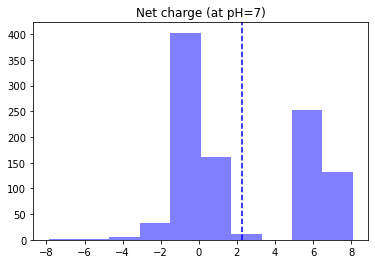

In [9]:
#bins = np.linspace(-6,8,20)
plt.hist(chargesData, alpha=0.5, color='b', linewidth=0)#, bins
plt.axvline(x=mean(charges), color='b', linestyle='--')
plt.title('Net charge (at pH=7)')
plt.show()
#plt.savefig('charge_raw.png')

In [15]:
sequences = gen_vae['proteins']

In [16]:
# List with the properties
charges=[]
weights=[]
logps=[]
hydro=[]

# Loop over the sequences
for seq in sequences:
    # Create the object and run the calculations
    pep=peptide_sequence(seq)
    pep.compute_peptide_charges()
    pep.calculate_properties_from_mol()
    pep.calculate_properties_from_sequence()
    
    # Append the properties to the lists
    charges.append(pep.netCharge)
    weights.append(pep.mol_weight)
    logps.append(pep.mol_logp)
    hydro.append(pep.avg_hydro)

print("The number of peptides with properties calculated is: {}".format(len(charges)))

The number of peptides with properties calculated is: 1000


In [17]:
chargesData=np.array(charges).astype(np.float)

C:\Users\migue\Anaconda3\envs\pepfun-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


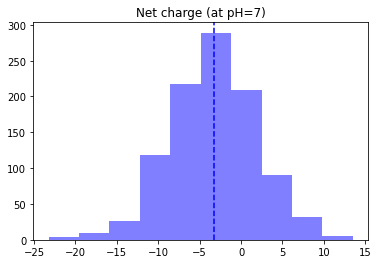

<Figure size 432x288 with 0 Axes>

In [18]:
#bins = np.linspace(-6,8,20)
plt.hist(chargesData, alpha=0.5, color='b', linewidth=0)#, bins
plt.axvline(x=mean(charges), color='b', linestyle='--')
plt.title('Net charge (at pH=7)')
plt.show()
plt.savefig('charge_gan_rules.png')

In [ ]:
###########################################   VAE EA  SO   ###################################################

In [3]:
vae_hydro = pd.read_csv('VAE_ga_trim1.csv')
vae_solub = pd.read_csv('VAE_ga_solub_trim1.csv')
vae_synt = pd.read_csv('VAE_ga_synt_trim1.csv')
vae_hmm = pd.read_csv('VAE_ga_hmm_trim1.csv')

In [13]:
sequences = vae_hydro['proteins']

In [14]:
# List with the properties
charges=[]
weights=[]
logps=[]
hydro=[]

# Loop over the sequences
for seq in sequences:
    # Create the object and run the calculations
    pep=peptide_sequence(seq)
    pep.compute_peptide_charges()
    pep.calculate_properties_from_mol()
    pep.calculate_properties_from_sequence()
    
    # Append the properties to the lists
    charges.append(pep.netCharge)
    weights.append(pep.mol_weight)
    logps.append(pep.mol_logp)
    hydro.append(pep.avg_hydro)

print("The number of peptides with properties calculated is: {}".format(len(charges)))

The number of peptides with properties calculated is: 1000


In [15]:
chargesData=np.array(charges).astype(np.float)

C:\Users\migue\Anaconda3\envs\pepfun-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


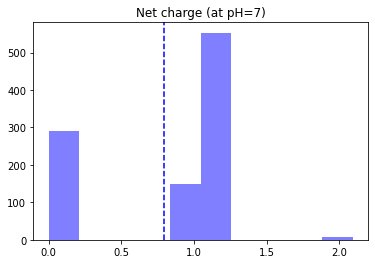

<Figure size 432x288 with 0 Axes>

In [16]:
#bins = np.linspace(-6,8,20)
plt.hist(chargesData, alpha=0.5, color='b', linewidth=0)#, bins
plt.axvline(x=mean(charges), color='b', linestyle='--')
plt.title('Net charge (at pH=7)')
plt.show()
plt.savefig('charge_gan_hidro.png')

In [ ]:
########################## VAE MO ###############################################

In [21]:
vae_nsga = pd.read_csv('VAE_nsga_trim1.csv')
vae_spea = pd.read_csv('VAE_spea_trim1.csv')
vae_nsga3 = pd.read_csv('VAE_nsga3_trim1.csv')

In [31]:
sequences = vae_nsga3['proteins']
print (sequences)

0      IKLSISPVETLKQTVELAKQAEKWGYHRFWVSEHHFSGSPEVLISH...
1      MKFGVFAEAAERFEDQVEQARMIEQRDFTTVWITEHTSNEPSPMVV...
2      MKFSLFYEAEWSVSDRRSFNDLVEQTLMAEEGDFTTVWIPEHHSME...
3      IKLSISPAETLKQTVELAKQAEKWGYHRFWVSEHHFSGSPEVLISH...
4      MKFSLFYEAEWSVSDRRSFNDLTEQTLMAEEGDFTTVWIPEHHSME...
                             ...                        
995    LKFSLVEAIPRTFHKTVELAVLAEELGFDTLWVREVHLNDYSFSPF...
996    LSFGFITEGVPETFQKALELAKQAEKSDFAALWVREVPFNDYGPSP...
997    IKLSISPAEALSHTVELAVQAEKWGFHRFWVSEHHFAGSPEVLISH...
998    KKLSIPADTLHQSVELAVLAEELGFDRAWFAEHHFASSPVVLISHI...
999    MKFSLFHTQSHRDLFEDTVELAVMAEELGFDTVWIREHHAMRPSPL...
Name: proteins, Length: 1000, dtype: object


In [32]:
# List with the properties
charges=[]
weights=[]
logps=[]
hydro=[]

# Loop over the sequences
for seq in sequences:
    # Create the object and run the calculations
    pep=peptide_sequence(seq)
    pep.compute_peptide_charges()
    pep.calculate_properties_from_mol()
    pep.calculate_properties_from_sequence()
    
    # Append the properties to the lists
    charges.append(pep.netCharge)
    weights.append(pep.mol_weight)
    logps.append(pep.mol_logp)
    hydro.append(pep.avg_hydro)

print("The number of peptides with properties calculated is: {}".format(len(charges)))

The number of peptides with properties calculated is: 1000


In [33]:
chargesData=np.array(charges).astype(np.float)

C:\Users\migue\Anaconda3\envs\pepfun-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


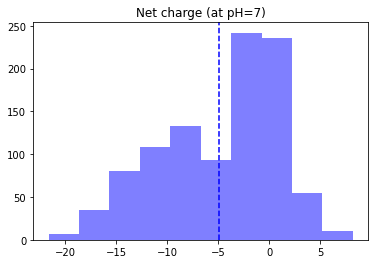

In [34]:
plt.hist(chargesData, alpha=0.5, color='b', linewidth=0)#, bins
plt.axvline(x=mean(charges), color='b', linestyle='--')
plt.title('Net charge (at pH=7)')
plt.show()